In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [26]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [27]:
import tensorflow as tf
from sklearn.datasets import load_digits
from tensorflow import keras

# Data Preperation

In [28]:
digits, labels = load_digits(return_X_y=True) # Structure of the data 

In [29]:
digits[0] # See the first digit

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [30]:
# plt.imshow(digits[99]) # Visualization, its will not show becasue of 1 dimenstion, see below, to see need to reshape

In [31]:
digits[0].shape # Verify its 1D, shape is 64 so it will be (8,8)=64, j duto multiply kore, we will get 64, that is the shape

(64,)

<IPython.core.display.Javascript object>


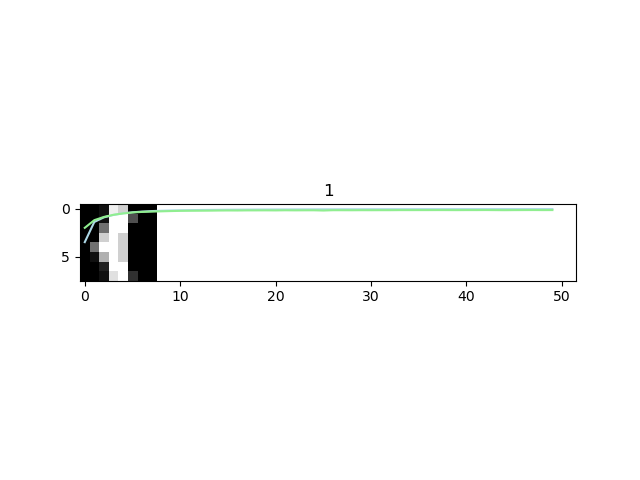

In [32]:
plt.title(labels[99])  # return   # Title or image number 1
plt.imshow(digits[99].reshape(8,8), cmap='gray')  # colorMap- Gray, reshape in sense of visualization

In [33]:
digits.shape  # total iamge number is 1797 of 64 values

(1797, 64)

In [34]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [35]:
labels_onehot =tf.one_hot(
    labels, depth=10   # indices already provided inside labels, depth=10 becuase it involves 10 class in last layer
)
# labels & depth provided into one-hot encoding

In [36]:
labels_onehot  # this one hot encoded labels to be passed into models while split the data. This STEP is MUST whenever multiclas

<tf.Tensor: shape=(1797, 10), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

In [37]:
digits.transpose()  # just to see, no application

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 5.,  0.,  0., ...,  1.,  2., 10.],
       ...,
       [ 0., 10., 16., ...,  6., 12., 12.],
       [ 0.,  0.,  9., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

# Split the data

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split (
digits, labels_onehot.numpy(), random_state=33, test_size=.30
)
# labels_onehot must be converted into numply as .numpy()
# x = digits, y= lables, 30% will be used for testing & rest of it will be used for training
# This code will confirm the training

# DNN (Deep Neural Network)

In [40]:
dnn = keras.Sequential()  # Creating DNN
dnn

In [41]:
# taking Dense Layer from keras with 32/any no of neuron, any activation can apply
dnn.add(keras.layers.Dense(units=32, activation='leaky_relu', input_shape=(64,))) # add 1st layer, input shape need to mention inside dence layer
dnn.add(keras.layers.Dense(units=16, activation='leaky_relu')) # add 2nd Layer
dnn.add(keras.layers.Dense(units=10, activation='softmax'))    # add 3rd layer/Output Layer

In [42]:
# Verify wheter layers added or not
# dnn.summary() by this fn we can verify, but it can be verified after traing the model only

In [43]:
dnn.compile(
    optimizer = keras.optimizers.Nadam(learning_rate=0.001),
    loss =keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy',]
)

In [44]:
dnn.fit(
    x=xtrain, y=ytrain, epochs=50, verbose=1, validation_data=(xtest, ytest)
)   

Epoch 1/50
40/40 [==============================] - 1s 5ms/step - loss: 3.4725 - accuracy: 0.2331 - val_loss: 1.9735 - val_accuracy: 0.3796
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 1.3597 - accuracy: 0.5632 - val_loss: 1.1693 - val_accuracy: 0.6444
Epoch 3/50
40/40 [==============================] - 0s 1ms/step - loss: 0.8780 - accuracy: 0.7438 - val_loss: 0.8323 - val_accuracy: 0.7389
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 0.6265 - accuracy: 0.8154 - val_loss: 0.6068 - val_accuracy: 0.8352
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.8687 - val_loss: 0.4650 - val_accuracy: 0.8667
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.8998 - val_loss: 0.3683 - val_accuracy: 0.9037
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2720 - accuracy: 0.9173 - val_loss: 0.3048 - val_accuracy: 0.9148
Epoch 8/50
40/40 [==

- After 50 iteration, we found the accuracy is 95.74% on validation data / Testing data
- After 50 iteration, we found the accuracy is 100% on training data 
- the loss found as: 0.0100
- So, whenever Multiclass (10 nueron), we must always do One-hot encoding over Class Labels if we want to work with SoftMax
- That means for multiclas this one-hot is very essential

#### Validation Data

- A validation data set is a data-set of examples used to tune the hyperparameters (i.e. the architecture) of a classifier. It is sometimes also called the development set or the "dev set".

### Model Information

In [45]:
dnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 2,778
Trainable params: 2,778
Non-trainable params: 0
_________________________________________________________________


- Param is features like weight & bias
- A single feature can be evaluated by different nueron differently, at the it will evaluate it find the parameter combination that requires / indentify the particular neuron's weight & bias & that will help to create a pattern to activate the correct neuron of last layer.  


### Model Summary

In [46]:
hist = pd.DataFrame(dnn.history.history) # Model Summary in Data Frame
hist

,loss,accuracy,val_loss,val_accuracy
0,3.472490,0.233095,1.973543,0.379630
1,1.359658,0.563246,1.169335,0.644444
2,0.878034,0.743835,0.832310,0.738889
3,0.626527,0.815434,0.606771,0.835185
4,0.459579,0.868735,0.464994,0.866667
5,0.346745,0.899761,0.368255,0.903704
6,0.272001,0.917263,0.304821,0.914815
7,0.219382,0.945107,0.272171,0.924074
8,0.184950,0.951472,0.243341,0.924074
9,0.155231,0.963405,0.216949,0.927778


### Graphical Representation

In [47]:
# plt.plot(x=hist.index, y=hist.loss, color = 'lightblue') # loss for traing data
# plt.plot(x=hist.index, y=hist.val_loss, color = 'lightgreen') # compare loss of validation data, to see whether overfit or not
# this will not take keywork argument, so it will expect value without keyword argument

#### Keywork Agrument

- Keyword arguments (or named arguments) are values that, when passed into a function, are identifiable by specific parameter names. A keyword argument is preceded by a parameter and the assignment operator, = . Keyword arguments can be likened to dictionaries in that they map a value to a keyword.

### Training Vs Validation Loss

<IPython.core.display.Javascript object>


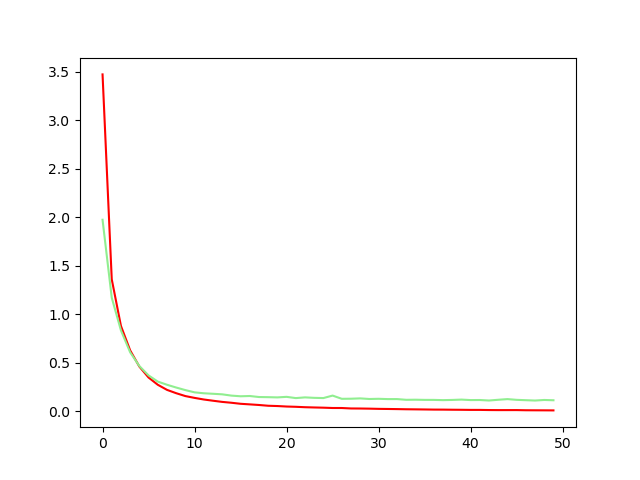

In [57]:
plt.plot(hist.index, hist.loss, color ='red')  # Training Loss
plt.plot(hist.index, hist.val_loss, color ='lightgreen') # Validation loss
plt.show()

- See appox 10th iteration, traing loss goes over validation loss, so model can be overfitted, we can stop here!

#### Training Vs Validation accuracy

In [56]:
# plt.plot(hist.index, hist.accuracy, color ='red')  # Training Accuracy
# plt.plot(hist.index, hist.val_accuracy, color ='lightgreen') # Validation Accuracy
# plt.show()